In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.color import rgb2gray

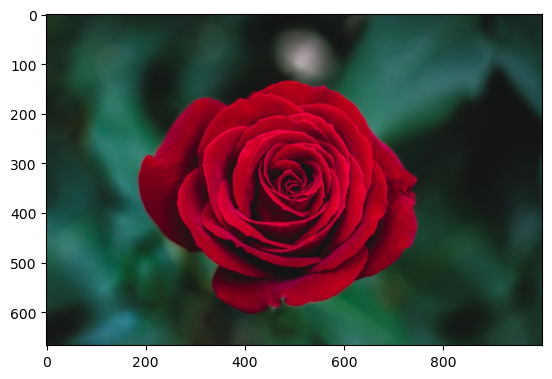

In [65]:
img = cv2.imread("./images/rose.jpg",1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


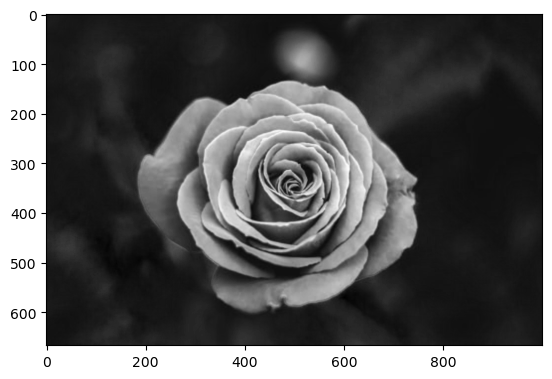

In [10]:
plt.imshow(img[:,:,0],cmap='grey')
plt.show()

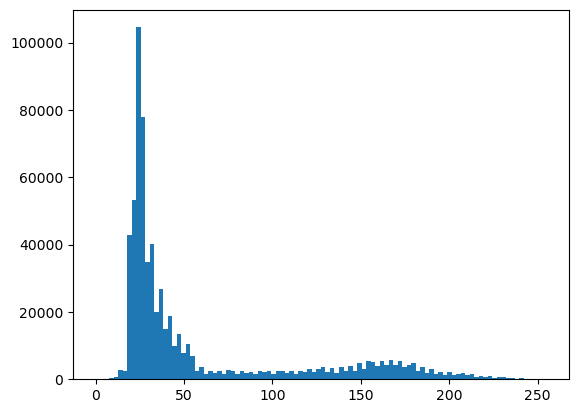

In [11]:
plt.hist(img[:,:,0].flat, bins=100, range=(0,255))
plt.show()

Threshold:65.0


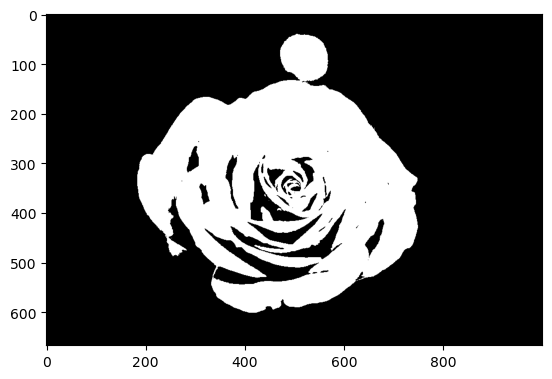

In [23]:
r_img = img[:,:,0].copy()
th, b_img = cv2.threshold(r_img, 65, 255, cv2.THRESH_BINARY)
print(f"Threshold:{th}" )
plt.imshow(b_img,cmap='grey')
plt.show()

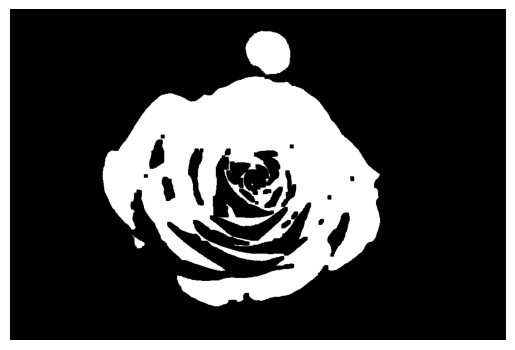

In [28]:
ksize = 3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(ksize,ksize))
eroded_img = cv2.erode(b_img, kernel, iterations = 3)

plt.imshow(eroded_img, cmap='gray')
plt.axis(False)
plt.show()

In [29]:
num_labels, labeledImg = cv2.connectedComponents(eroded_img)

num_grains = num_labels -1
print(num_grains)

13


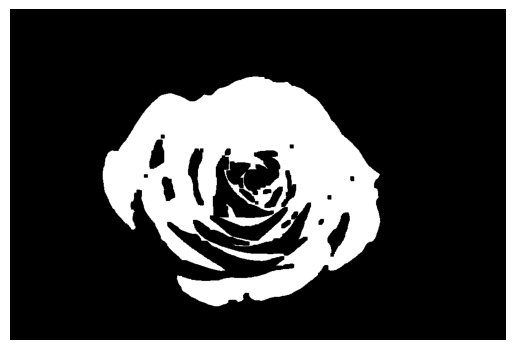

In [32]:
rose_mask = eroded_img.copy()

rose_mask[labeledImg!=2] = 0
plt.imshow(rose_mask, cmap='gray')
plt.axis(False)
plt.show()

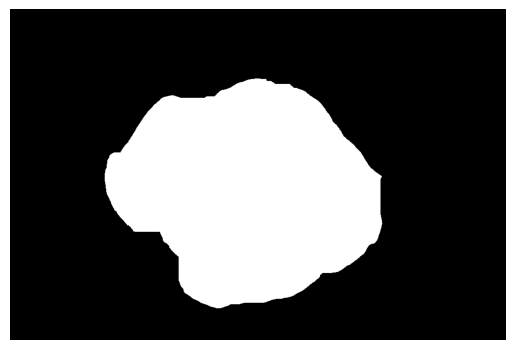

In [76]:
ksize = 50
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(ksize,ksize))

rose_mask = cv2.morphologyEx(rose_mask, cv2.MORPH_CLOSE, kernel)
plt.imshow(rose_mask, cmap='gray')
plt.axis(False)
plt.show()

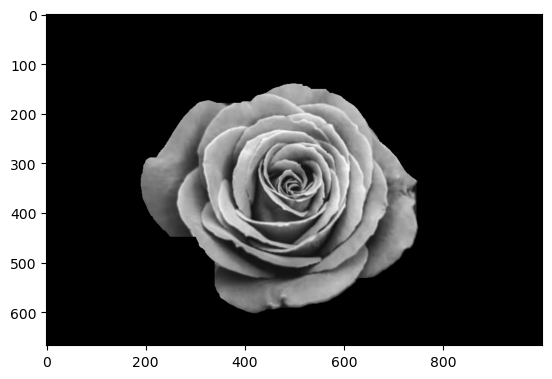

In [80]:
plt.imshow(cv2.bitwise_and(r_img,r_img,mask=rose_mask),cmap='grey')

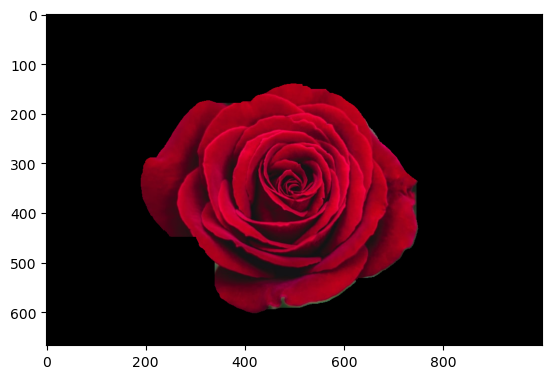

In [78]:
plt.imshow( cv2.bitwise_and(img,img,mask=rose_mask))